In [ ]:
from sklearn import metrics    
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np 
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting 
# Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
#from catboost              import CatBoostClassifier
import joblib
import sys


In [14]:
#Rock= 0
#Paper=1
#Scissor=2

In [ ]:
path = 'images'
data1 = pd.DataFrame ()
data2= pd.DataFrame()
for folder in os.listdir(path):
    if folder == 'train':
    
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) ) #creating a numpy array equal to size of training data
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int) #converting image to array which is later stored as csv file  
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data1 = pd.concat ([data1, class_data]) #adding data of each image in each cycle, which is later converted to a pandas dataframe
            print('Size after concatination')
            print(data1.shape)
    else:
        for f in os.listdir (path + '/' + folder): #same processs is done to the training data as well
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data2 = pd.concat ([data2, class_data]) #a dataframe of test data is stored as well as data2
            print('Size after concatenation')
            print(data2.shape)

            
data1.to_csv ('train_game.csv')
data2.to_csv('test_game.csv')

            


Original shape
(662, 1025)
Size after concatination
(662, 1025)
Original shape
(638, 1025)
Size after concatination
(1300, 1025)
Original shape
(689, 1025)
Size after concatination
(1989, 1025)
Original shape
(363, 1025)
Size after concatenation
(363, 1025)
Original shape
(328, 1025)
Size after concatenation
(691, 1025)
Original shape
(365, 1025)
Size after concatenation
(1056, 1025)


In [16]:
data2.iloc[:,-1].unique()
data2.shape

(1056, 1025)

In [17]:

#checking target column

data1.iloc[:,-1].unique()
data1.shape

(1989, 1025)

In [18]:
X_tr = data1.iloc[:,:1024]
y_tr = data1.iloc[:,1024]

X_val = data2.iloc[:,:1024]
y_val = data2.iloc[:,1024]

In [19]:
scaler = StandardScaler()

#normalizing the data
data_norm_train = scaler.fit_transform(X_tr)
data_norm_test = scaler.transform(X_val)


In [20]:
#sns.histplot(data=data_norm, bins=10)

In [21]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost":      AdaBoostClassifier(),
  "Skl GBM":       GradientBoostingClassifier(),
  "Skl HistGBM":   GradientBoostingClassifier(),
  "XGBoost":       XGBClassifier(),
  "LightGBM":      LGBMClassifier(),
  #"CatBoost":      CatBoostClassifier() 
}

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42, stratify=y_tr)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    start_time = time.time()
    model.fit(x_train, y_train)
    pred = model.predict(X_val)    # GET PREDICTIONS USING x_val
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Confusion Matrix": confusion_matrix(y_val, pred),
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
    
                              
                              

 
# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

In [ ]:
#Automatically chooses the best model

# Your code goes here

#results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
#results_ord.index += 1 
#results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

best_model_string = results_ord.iloc[0,0]
best_model_string

'Extra Trees'

In [ ]:
#saving model


model = tree_classifiers[best_model_string]
model_choice = 'best_model_2.sav'
joblib.dump(model, model_choice)

['best_model_2.sav']

In [ ]:
#loading model
loaded_model = joblib.load(model_choice)
result = loaded_model.score(X_val, y_val)
print(result)

0.9232954545454546


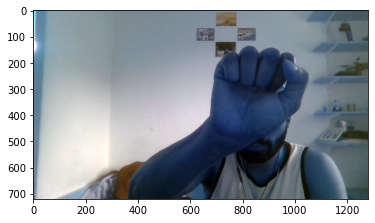

In [ ]:
import cv2
import matplotlib.pyplot as plt

rawimage = cv2.imread(r'C:\Users\User\Documents\GitHub\practice folders\Buildweek2.1\Telegram Bot Project\Telegram Bot - Machine Learning\WIN_20210813_16_14_03_Pro.jpg')

plt.imshow(rawimage, cmap= 'gray')


In [ ]:
rawimage.shape

(720, 1280, 3)

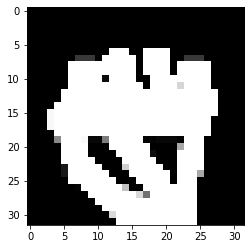

In [ ]:
#Transform the Image into 32 x 32 skeleton using transform_image.py

sys.path.append(r"C:\Users\User\Documents\GitHub\practice folders\Buildweek2.1\Telegram Bot Project\Telegram Bot - Machine Learning\handgestures")
from handgestures.transform_image import transform_single_image


img = transform_single_image(rawimage)

plt.imshow(img, cmap="gray")




In [ ]:
img.shape

(32, 32)

In [ ]:
#TEMPORARY - REPLACE WITH IMPORTING FROM JOBLIB

model = tree_classifiers[results_ord.iloc[0,0]]



NameError: name 'tree_classifiers' is not defined

In [ ]:
#Transfrom the skeleton image into a flatenned array
img_arr = np.array(img, dtype = int)
img_arr = img_arr.flatten()
class_data_trail= pd.DataFrame(img_arr)
class_data_trail=class_data_trail.transpose()

img_arr.shape


(1024,)

In [ ]:
#Use the Chosen MACHINE LEARNING MODEL to classify the input


rps_input_predict = model.predict(class_data_trail)

print(rps_input_predict[0])

if int(rps_input_predict[0]) == 0:
    print("You choose ROCK!")
elif int(rps_input_predict[0]) == 1:
    print("You choose PAPER!")
else:
    print("You choose SCISSORS")

[2.]
You choose SCISSORS
